#Frequency Domain Zero Padding

Zero padding in the frequency domain corresponds to the sinc interpolation in the time domain.

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.fftpack 

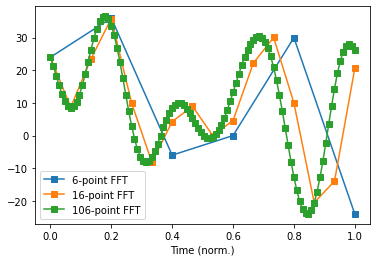

In [3]:
# create the signal
signal = [ 4, 6, -1, 0, 5, -4 ]

# number of zeros to add after spectrum
n2pad = [ 0, 10, 100 ]

for zi in range(0,len(n2pad)):
    
    # fft
    signalX = scipy.fftpack.fft(signal)
    
    # spectral zero-padding
    zeropadN = len(signal)+n2pad[zi]
    
    # reconstruction via ifft
    reconSig = scipy.fftpack.ifft(signalX,zeropadN) * zeropadN
    normtime = np.linspace(0,1,len(reconSig))
    
    # and plot
    plt.plot(normtime,np.real(reconSig),'s-',label='%g-point FFT' %zeropadN)

# add some plot extras
plt.legend()
plt.xlabel('Time (norm.)')
plt.show()

The actual signal is the blue one. Though this is not a very accurate answer, but just example. 

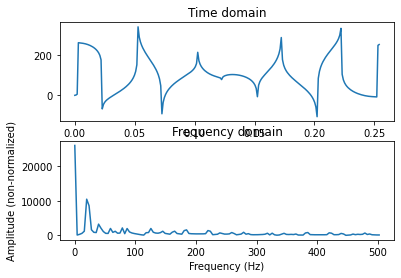

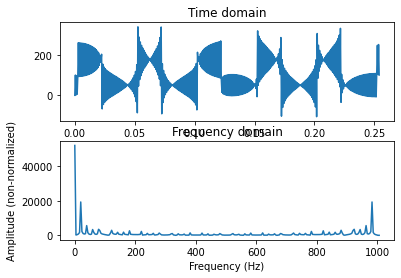

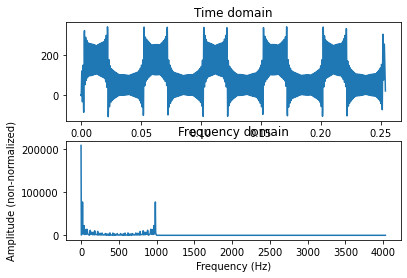

In [5]:
## Another example

# create the signal
srate  = 1000
x      = np.array(range(0,255))/srate
signal = np.sin(2*np.pi*20*x)>.3

# number of zeros to add after spectrum
n2pad = [ 1, 2, 5 ];

for zi in range(0,len(n2pad)):
    
    # fft
    signalX = scipy.fftpack.fft(signal)
    
    # spectral zero-padding
    zeropadN = 2**math.ceil(math.log(len(signal)*n2pad[zi],2))
    
    # reconstruction via ifft
    reconSig = scipy.fftpack.ifft(signalX,zeropadN) * zeropadN
    normtime = np.linspace(x[0],x[-1],len(reconSig)) # new time vector
    srateNew = 1/np.mean(np.diff(normtime)) # new sampling rate
    
    # power spectrum
    ampl = np.abs(scipy.fftpack.fft( np.real(reconSig) ))
    hz   = np.linspace(0,srateNew/2,np.int(np.floor(len(reconSig)/2+1)))
    
    plt.subplot2grid((2,1), (0,0))
    plt.plot(normtime,np.real(reconSig),label='%g-point IFFT' %zeropadN)
    plt.xlabel('Time (sec.)')
    plt.title('Time domain')
    
    # plot amplitude spectrum
    plt.subplot2grid((2,1), (1,0))
    plt.plot(hz,ampl[0:len(hz)])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (non-normalized)')
    plt.title('Frequency domain')
    plt.show()



